In [355]:
import numpy as np
import matplotlib.pyplot as plt

In [356]:
def tanh_f(x):
    return np.tanh(x - 1)

In [357]:
def polynom_f(x):
    return x ** 3 + (0.1 * x**2) + 0.0001 * x

def polynom_f_1(x):
    return x ** 3 + (0.1 * x**2) + 0.1 * x

def polynom_f_2(x):
    return x ** 3 + (0.1 * x**2) + 0.01 * x

def polynom_f_3(x):
    return x ** 3 + (0.1 * x**2) + 0.001 * x
    

Forklaring:
  Estimatet for Epsilon a = abs(xi+1 - xi)
  Estimatet for Epsilon r = abs(xi+1 - xi/xi)
   Det har ikke noe å si om man bruker Er eller Ea i dette tilfellet fordi den balanserer seg rundt 1. Noe som er delelig med seg selv er 1, vi bytter altså ut xStar med 
 xi+1 for å kunne estimere Epsilon

 Konvergerings området er mellom -1.33 og 3.98
 x1 kan ikke være høyere enn 3.98 eller lavere enn -1.33 fordi da vil resultate av funksjonene være for like til at man ender opp med å dele på 0 som ikke går


In [358]:
def secant(f, x0, x1, eps_r, eps_a):
    listOfX = []
    while True:
        x = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        listOfX.append(x)
        if abs(x1 - x) < eps_a or abs((x1 - x)/x) < eps_r:
            return listOfX, len(listOfX)
        if x != x:
            return x, 'x er ikke et tall lenger'
        x0 = x1
        x1 = x

listen, counter = secant(tanh_f, 0, 3.98, 0.0001, 0.0001)
print(listen, counter)


[1.7257245385822526, -2.009875249565276, 0.29112790862503823, 3.934964142246129, 1.6765131939689781, -1.6083939754576422, 0.45023669076991046, 2.5571952614061066, 1.1950934738531975, 0.8317917715453276, 1.0002896356850872, 0.9999972782261857, 1.0000000000000755] 13


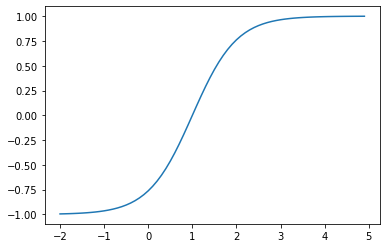

In [359]:

plt.plot(np.arange(-2, 5, 0.1), tanh_f(np.arange(-2, 5, 0.1)))

At en funksjon er superlinear betyr:
Når alpha er lik 1.61
Vi ser at den er superlineær siden vår x verdi i secant metoden går mot null. 


[0.4210304720804168, 0.36794031159006974, 0.2519661607037773, 0.18871314146707624, 0.13473095277047353, 0.09644179099484473, 0.06759124789687648, 0.046653845612048515, 0.031536051157886165, 0.020870880578137033, 0.013502766794733102, 0.008534511158110304, 0.005259100008851573, 0.0031435749961251686, 0.0018023549037967886, 0.0009693787373448855, 0.0004686897569829315, 0.00018778850020340082, 5.337184729255087e-05, 8.091536957433603e-06] 20


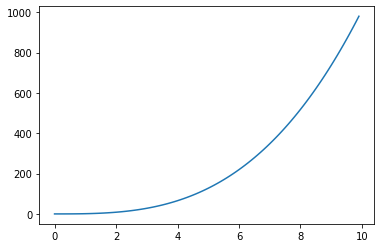

In [360]:
plt.plot(np.arange(0, 10, 0.1), polynom_f(np.arange(0, 10, 0.1)))
polynom_listen, counter_p = secant(polynom_f, 0.5, 1, 0.0001, 0.0001)
print(polynom_listen, counter_p)


In [361]:
def log(e3, e2, e1):
    upper = np.log(e3/e2)
    lower = np.log(e2/e1)
    return upper/lower

def log10(e3, e2, e1):
    upper = np.log10(e3/e2)
    lower = np.log10(e2/e1)
    return upper/lower

print(log10((abs(1.2047091268146627e-07 - 9.12371726611975e-06)), (abs(9.12371726611975e-06 - 0.00013373933415456005)), (abs(0.00013373933415456005 - 0.0007355593825306695))))

1.6686402254714854


Naturlige logaritmen:
a = 0.000001 gir 1.0028537544478202
a = 0.0001 gir 1.476234890711224
a = 0.001 gir 1.6686402254714854
a = 0.01 gir 1.6649866408853549
a = 0.1 gir 1.679692241239672

10 logaritmen gir det samme

20 [ 0.86505007  0.99983455  1.37846048  1.66752719  2.00447543  2.33881565
  2.69427677  3.06499992  3.45662391  3.86940037  4.30486067  4.7636372
  5.24779537  5.76239459  6.31866119  6.93885517  7.66556951  8.58019423
  9.83822716 11.72469186]
9 [ 0.91629073  1.09861229  1.64865863  2.20773382  3.1598207   4.73290332
  7.55022081 12.20405138 19.74950985]
13 [ 0.87024679  1.0097175   1.40468482  1.71698447  2.10039771  2.51617001
  3.02472361  3.6819511   4.62132127  6.07063811  8.40044815 12.16907685
 18.26694507]
17 [ 0.86552361  1.00073381  1.38083838  1.67198071  2.01300117  2.35425621
  2.72210442  3.11445863  3.54400186  4.0227257   4.57277565  5.23129472
  6.06781715  7.21487928  8.91961792 11.60463324 15.9318575 ]


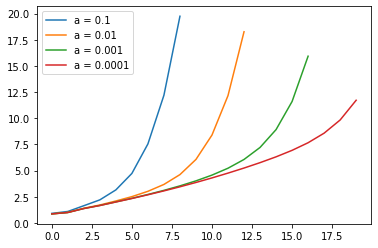

In [362]:
val, count = secant(polynom_f, 0.5, 1, 0.0001, 0.0001)
val1, count1 = secant(polynom_f_1, 0.5, 1, 0.0001, 0.0001)
val2, count2 = secant(polynom_f_2, 0.5, 1, 0.0001, 0.0001)
val3, count3 = secant(polynom_f_3, 0.5, 1, 0.0001, 0.0001)

plt.plot(np.arange(0, len(val1), 1), abs(np.log(val1)), label="a = 0.1")
plt.plot(np.arange(0, len(val2), 1), abs(np.log(val2)), label="a = 0.01")
plt.plot(np.arange(0, len(val3), 1), abs(np.log(val3)), label="a = 0.001")
plt.plot(np.arange(0, len(val), 1), abs(np.log(val)), label ="a = 0.0001")
plt.legend(loc="upper left")

print(count, abs(np.log(val)))
print(count1, abs(np.log(val1)))
print(count2, abs(np.log(val2)))
print(count3, abs(np.log(val3)))

20 [ 0.86505007  0.99983455  1.37846048  1.66752719  2.00447543  2.33881565
  2.69427677  3.06499992  3.45662391  3.86940037  4.30486067  4.7636372
  5.24779537  5.76239459  6.31866119  6.93885517  7.66556951  8.58019423
  9.83822716 11.72469186]
9 [ 0.91629073  1.09861229  1.64865863  2.20773382  3.1598207   4.73290332
  7.55022081 12.20405138 19.74950985]
13 [ 0.87024679  1.0097175   1.40468482  1.71698447  2.10039771  2.51617001
  3.02472361  3.6819511   4.62132127  6.07063811  8.40044815 12.16907685
 18.26694507]
17 [ 0.86552361  1.00073381  1.38083838  1.67198071  2.01300117  2.35425621
  2.72210442  3.11445863  3.54400186  4.0227257   4.57277565  5.23129472
  6.06781715  7.21487928  8.91961792 11.60463324 15.9318575 ]


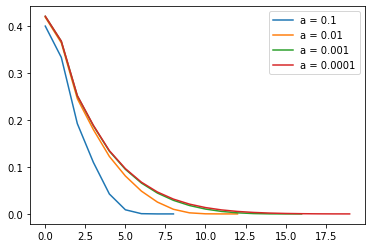

In [364]:
val, count = secant(polynom_f, 0.5, 1, 0.0001, 0.0001)
val1, count1 = secant(polynom_f_1, 0.5, 1, 0.0001, 0.0001)
val2, count2 = secant(polynom_f_2, 0.5, 1, 0.0001, 0.0001)
val3, count3 = secant(polynom_f_3, 0.5, 1, 0.0001, 0.0001)

plt.plot(np.arange(0, len(val1), 1), val1, label="a = 0.1")
plt.plot(np.arange(0, len(val2), 1), val2, label="a = 0.01")
plt.plot(np.arange(0, len(val3), 1), val3, label="a = 0.001")
plt.plot(np.arange(0, len(val), 1), val, label ="a = 0.0001")
plt.legend(loc="upper right")

print(count, abs(np.log(val)))
print(count1, abs(np.log(val1)))
print(count2, abs(np.log(val2)))
print(count3, abs(np.log(val3)))